## Pac-Man UCS + Greedy Algo and Visualisation 

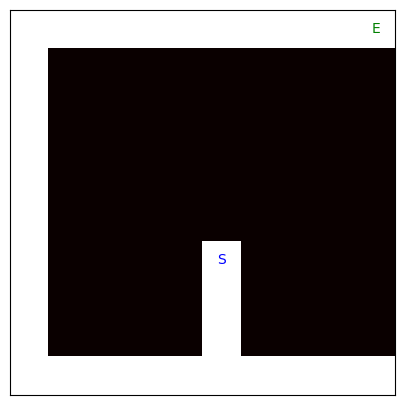

In [7]:
from queue import PriorityQueue
import matplotlib.pyplot as plt
import numpy as np

# Maze size and corners
maze_size = 10
corners = [(0, 0), (0, 9), (9, 0), (9, 9)]

# Initial state
initial_state = ((5, 5), frozenset())

# Actions: up, down, left, right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def ucs_with_path():
    frontier = PriorityQueue()
    frontier.put((0, initial_state, None))  # (cost, state, parent)
    explored = {}
    parents = {}

    while not frontier.empty():
        cost, current_state, parent = frontier.get()
        position, visited_corners = current_state

        if len(visited_corners) == len(corners):
            # Reconstruct the path
            path = []
            while current_state in parents:
                path.append(position)
                current_state = parents[current_state]
                position = current_state[0]
            path.reverse()
            return path
        
        if current_state not in explored:
            explored[current_state] = cost
            for action in actions:
                new_position = (position[0] + action[0], position[1] + action[1])
                
                if 0 <= new_position[0] < maze_size and 0 <= new_position[1] < maze_size:
                    new_visited_corners = set(visited_corners)
                    if new_position in corners:
                        new_visited_corners.add(new_position)
                    new_state = (new_position, frozenset(new_visited_corners))
                    new_cost = cost + 1
                    if new_state not in explored or new_cost < explored[new_state]:
                        frontier.put((new_cost, new_state, current_state))
                        parents[new_state] = current_state  # Save parent

    return []


def visualize_path(path):
    maze = np.zeros((maze_size, maze_size))
    
    for x, y in corners:
        maze[x, y] = 0.5  # Mark corners
    
    for x, y in path:
        maze[x, y] = 1  # Mark path
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze, cmap='hot', interpolation='nearest')
    
    if path:
        ax.text(path[0][1], path[0][0], 'S', ha='center', va='center', color='blue')
        ax.text(path[-1][1], path[-1][0], 'E', ha='center', va='center', color='green')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Run the UCS algorithm to find the path
ucs_path = ucs_with_path()

# Visualize the path found by UCS
visualize_path(ucs_path)


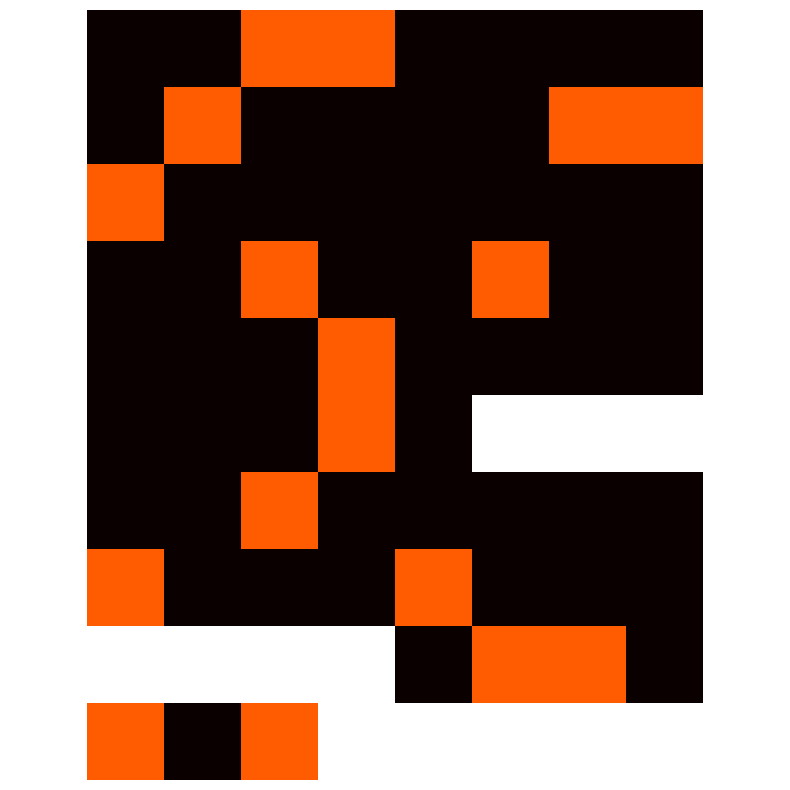

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
import random

# Define the size of the maze
maze_size = 10

# Corners and initial position
corners = [(0, 0), (0, maze_size - 1), (maze_size - 1, 0), (maze_size - 1, maze_size - 1)]
initial_position = (maze_size // 2, maze_size // 2)  # Place Pac-Man in the center

# Directions Pac-Man can move
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Function to create a random maze layout
def create_random_maze(maze_size, density=0.2):
    maze = np.zeros((maze_size, maze_size), dtype=int)
    for i in range(maze_size):
        for j in range(maze_size):
            if random.random() < density and (i, j) not in corners and (i, j) != initial_position:
                maze[i][j] = 1
    return maze

# Check if a move is valid (inside maze bounds and not a wall)
def is_valid_move(maze, position):
    x, y = position
    if 0 <= x < maze_size and 0 <= y < maze_size and maze[x][y] == 0:
        return True
    return False

# UCS algorithm with walls
def ucs_with_path_and_walls(maze, start, goals):
    initial_state = (start, frozenset())
    frontier = PriorityQueue()
    frontier.put((0, initial_state))
    explored = set()
    parents = {}

    while not frontier.empty():
        cost, current_state = frontier.get()
        position, visited_corners = current_state

        if position in goals and len(visited_corners) == len(goals):
            path = []
            while current_state != (start, frozenset()):
                path.append(position)
                current_state = parents[current_state]
                position = current_state[0]
            return path[::-1]

        explored.add(current_state)

        for action in actions:
            new_position = (position[0] + action[0], position[1] + action[1])
            new_visited_corners = set(visited_corners)
            if new_position in goals:
                new_visited_corners.add(new_position)
            new_state = (new_position, frozenset(new_visited_corners))

            if new_state not in explored and is_valid_move(maze, new_position):
                frontier.put((cost + 1, new_state))
                parents[new_state] = current_state

    return []

# Visualization function
def visualize_maze_with_path(maze, path):
    maze_array = np.array(maze)
    for position in path:
        maze_array[position] = 2  # Mark the path in the maze
    plt.figure(figsize=(10, 10))
    plt.imshow(maze_array, cmap='hot', interpolation='nearest')
    plt.axis('off')
    plt.show()

# Generate a random maze until we get a solvable one
while True:
    random_maze = create_random_maze(maze_size)
    path = ucs_with_path_and_walls(random_maze, initial_position, corners)
    if path:
        break  # We found a solvable maze

# Visualize the maze with the UCS path
visualize_maze_with_path(random_maze, path)
